# Package & data

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact
from matplotlib.patches import Circle, Rectangle, Arc


In [35]:
shot_location = pd.read_csv("../data/raw/NBA_Shot_Locations_1997-2020/NBA_Shot_Locations_1997-2020.csv")
display(shot_location.head())
display(shot_location.info())
display(shot_location.isnull().sum())
display(shot_location.duplicated().sum())

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729512 entries, 0 to 4729511
Data columns (total 22 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Game ID            int64 
 1   Game Event ID      int64 
 2   Player ID          int64 
 3   Player Name        object
 4   Team ID            int64 
 5   Team Name          object
 6   Period             int64 
 7   Minutes Remaining  int64 
 8   Seconds Remaining  int64 
 9   Action Type        object
 10  Shot Type          object
 11  Shot Zone Basic    object
 12  Shot Zone Area     object
 13  Shot Zone Range    object
 14  Shot Distance      int64 
 15  X Location         int64 
 16  Y Location         int64 
 17  Shot Made Flag     int64 
 18  Game Date          int64 
 19  Home Team          object
 20  Away Team          object
 21  Season Type        object
dtypes: int64(12), object(10)
memory usage: 793.8+ MB


None

Game ID              0
Game Event ID        0
Player ID            0
Player Name          0
Team ID              0
Team Name            0
Period               0
Minutes Remaining    0
Seconds Remaining    0
Action Type          0
Shot Type            0
Shot Zone Basic      0
Shot Zone Area       0
Shot Zone Range      0
Shot Distance        0
X Location           0
Y Location           0
Shot Made Flag       0
Game Date            0
Home Team            0
Away Team            0
Season Type          0
dtype: int64

0

# Exploration graphique

Integrer ici les graphiques d'exploration du df

In [36]:
# Créez un DataFrame avec les données filtrées pour "Shot Made Flag" = 1
shot_made_df = shot_location[shot_location["Shot Made Flag"] == 1]

# Créez un DataFrame avec les données filtrées pour "Shot Made Flag" = 0
shot_missed_df = shot_location[shot_location["Shot Made Flag"] == 0]

# Groupez les données par "Action Type" et comptez le nombre d'occurrences
shot_made_counts = shot_made_df["Action Type"].value_counts()
shot_missed_counts = shot_missed_df["Action Type"].value_counts()

# Créez un DataFrame combinant les deux
stacked_df = pd.DataFrame({
    "Action Type": shot_location["Action Type"].unique(),
    "Made": shot_made_counts,
    "Missed": shot_missed_counts
}).fillna(0)

# Calculez les pourcentages de réussite et d'échec
stacked_df["Percentage Made"] = (stacked_df["Made"] / (stacked_df["Made"] + stacked_df["Missed"])) * 100
stacked_df["Percentage Missed"] = (stacked_df["Missed"] / (stacked_df["Made"] + stacked_df["Missed"])) * 100

# Triez le DataFrame en fonction du pourcentage de réussite ("Percentage Made") dans l'ordre décroissant
stacked_df = stacked_df.sort_values(by="Percentage Made", ascending=False)

# Créez un Stacked Bar Chart Plotly
fig = px.bar(stacked_df, x="Action Type", y=["Percentage Made", "Percentage Missed"],
             title="Action Type vs. Shot Made Flag",
             labels={"value": "Pourcentage", "variable": "Shot Result"},
             color_discrete_map={"Percentage Made": "blue", "Percentage Missed": "grey"})

fig.update_xaxes(tickangle=45)

# Affichez la figure Plotly
fig.show()


In [37]:
# Filtrer les données pour "Shot Type" égal à "2PT Field Goal" ou "3PT Field Goal"
filtebleu_data = shot_location[shot_location["Shot Type"].isin(["2PT Field Goal", "3PT Field Goal"])]

# Grouper les données par "Shot Type" et "Shot Made Flag", puis compter le nombre d'occurrences
grouped_data = filtebleu_data.groupby(["Shot Type", "Shot Made Flag"]).size().unstack(fill_value=0)

# Calculer les pourcentages de réussite et d'échec
grouped_data["Total"] = grouped_data[0] + grouped_data[1]
grouped_data["Percentage Made"] = (grouped_data[1] / grouped_data["Total"]) * 100
grouped_data["Percentage Missed"] = (grouped_data[0] / grouped_data["Total"]) * 100

# Réinitialiser l'index
grouped_data = grouped_data.reset_index()

# Créer un graphique Plotly en utilisant un graphique en barres empilées
fig = px.bar(grouped_data, x="Shot Type", y=["Percentage Made", "Percentage Missed"],
             title="Pourcentage de tirs réussis et manqués en fonction de Shot Type",
             labels={"value": "Pourcentage", "variable": "Shot Result"},
             color_discrete_map={"Percentage Made": "blue", "Percentage Missed": "gray"})
fig.show()


In [38]:
# Créez un DataFrame avec les données filtrées pour "Shot Made Flag" = 1
shot_made_df = shot_location[shot_location["Shot Made Flag"] == 1]

# Créez un DataFrame avec les données filtrées pour "Shot Made Flag" = 0
shot_missed_df = shot_location[shot_location["Shot Made Flag"] == 0]

# Groupez les données par "Shot Zone Basic" et comptez le nombre d'occurrences
shot_made_counts = shot_made_df["Shot Zone Basic"].value_counts()
shot_missed_counts = shot_missed_df["Shot Zone Basic"].value_counts()

# Créez un DataFrame combinant les deux
stacked_df = pd.DataFrame({
    "Shot Zone Basic": shot_location["Shot Zone Basic"].unique(),
    "Made": shot_made_counts,
    "Missed": shot_missed_counts
}).fillna(0)

# Calculez les pourcentages de réussite et d'échec
stacked_df["Percentage Made"] = (stacked_df["Made"] / (stacked_df["Made"] + stacked_df["Missed"])) * 100
stacked_df["Percentage Missed"] = (stacked_df["Missed"] / (stacked_df["Made"] + stacked_df["Missed"])) * 100

# Triez le DataFrame en fonction du pourcentage de réussite ("Percentage Made") dans l'ordre décroissant
stacked_df = stacked_df.sort_values(by="Percentage Made", ascending=False)

# Créez un Stacked Bar Chart Plotly
fig = px.bar(stacked_df, x="Shot Zone Basic", y=["Percentage Made", "Percentage Missed"],
             title="Pourcentage de réussite par Shot Zone Basic",
             labels={"value": "Pourcentage", "variable": "Shot Result"},
             color_discrete_map={"Percentage Made": "blue", "Percentage Missed": "gray"})

fig.update_xaxes(tickangle=45)

# Affichez la figure Plotly
fig.show()


In [39]:
# Créez un DataFrame avec les données filtrées pour "Shot Made Flag" = 1
shot_made_df = shot_location[shot_location["Shot Made Flag"] == 1]

# Créez un DataFrame avec les données filtrées pour "Shot Made Flag" = 0
shot_missed_df = shot_location[shot_location["Shot Made Flag"] == 0]

# Groupez les données par "Shot Zone Area" et comptez le nombre d'occurrences
shot_made_counts = shot_made_df["Shot Zone Area"].value_counts()
shot_missed_counts = shot_missed_df["Shot Zone Area"].value_counts()

# Créez un DataFrame combinant les deux
stacked_df = pd.DataFrame({
    "Shot Zone Area": shot_location["Shot Zone Area"].unique(),
    "Made": shot_made_counts,
    "Missed": shot_missed_counts
}).fillna(0)

# Calculez les pourcentages de réussite et d'échec
stacked_df["Percentage Made"] = (stacked_df["Made"] / (stacked_df["Made"] + stacked_df["Missed"])) * 100
stacked_df["Percentage Missed"] = (stacked_df["Missed"] / (stacked_df["Made"] + stacked_df["Missed"])) * 100

# Triez le DataFrame en fonction du pourcentage de réussite ("Percentage Made") dans l'ordre décroissant
stacked_df = stacked_df.sort_values(by="Percentage Made", ascending=False)

# Créez un Stacked Bar Chart Plotly
fig = px.bar(stacked_df, x="Shot Zone Area", y=["Percentage Made", "Percentage Missed"],
             title="Pourcentage de réussite par Shot Zone Area",
             labels={"value": "Pourcentage", "variable": "Shot Result"},
             color_discrete_map={"Percentage Made": "blue", "Percentage Missed": "gray"})

fig.update_xaxes(tickangle=45)

# Affichez la figure Plotly
fig.show()


## Shot chart

In [40]:
###########################################  NBA Draw court ################################################

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax



### Afficher les shot des joueurs

In [54]:

###########################################  NBA shot by player ################################################


# Liste des noms de joueurs uniques
unique_players = sorted(shot_location["Player Name"].unique())

# Fonction pour mettre à jour le graphique en fonction du nom du joueur sélectionné
def update_plot(player_name):
    player_shot_location = shot_location[shot_location['Player Name'] == player_name]
    
    # Créez une figure avec la taille souhaitée
    plt.figure(figsize=(6, 5.5))

    # Filtrer les données pour les tirs réussis (Shot Made Flag == 1) et les tirs manqués (Shot Made Flag == 0)
    successful_shots = player_shot_location[player_shot_location["Shot Made Flag"] == 1]
    missed_shots = player_shot_location[player_shot_location["Shot Made Flag"] == 0]

    # Affichez les tirs réussis en bleu
    plt.scatter(successful_shots["X Location"], successful_shots["Y Location"], c='blue', label='Made')

    # Affichez les tirs manqués en gris
    plt.scatter(missed_shots["X Location"], missed_shots["Y Location"], c='grey', label='Missed')

    # Dessinez le terrain
    draw_court()

    # Ajustez les limites du tracé pour s'adapter à la moitié du terrain
    plt.xlim(-250, 250)
    plt.ylim(422.5, -47.5)

    # Supprimez les étiquettes des axes
    plt.tick_params(labelbottom=False, labelleft=False)

    # Affichez la légende
    plt.legend()

    # Affichez le graphique
    plt.show()

# Créez un widget de liste déroulante pour sélectionner le joueur
player_dropdown = widgets.Dropdown(options=unique_players, description='Player Name:')

# Créez un graphique interactif
interact(update_plot, player_name=player_dropdown)

interactive(children=(Dropdown(description='Player Name:', options=('A.C. Green', 'A.J. Bramlett', 'A.J. Guyto…

<function __main__.update_plot(player_name)>

### Afficher densité des shots 

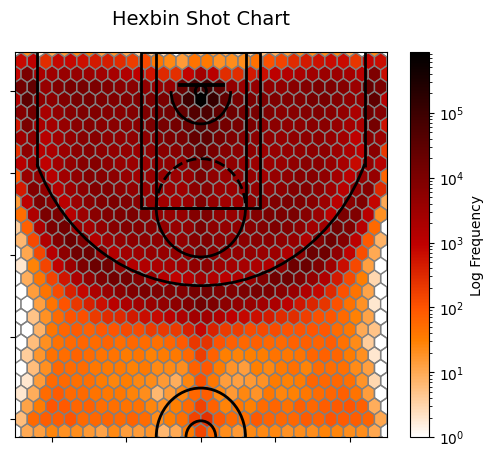

In [56]:
###########################################  NBA shot hexbin ################################################

import matplotlib.pyplot as plt

# Créer un hexbin des emplacements des tirs
plt.figure(figsize=(6, 5))
cmap = plt.cm.gist_heat_r
plt.hexbin(shot_location["X Location"], shot_location["Y Location"], gridsize=(30, 30), cmap=cmap, bins='log', edgecolors='grey')

# Ajuster les limites de l'axe et l'orientation du tracé pour s'adapter à la moitié du terrain
plt.xlim(-250, 250)
plt.ylim(422.5, -47.5)

draw_court()

# Supprimer les étiquettes des axes
plt.xlabel('')
plt.ylabel('')
plt.tick_params(labelbottom=False, labelleft=False)

# Ajouter un titre
plt.title('Hexbin Shot Chart', y=1.05, fontsize=14)

# Ajouter une barre de couleur
cb = plt.colorbar()
cb.set_label('Log Frequency')

# Afficher le graphique
plt.show()
